In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam
import glob

In [ ]:
image_directory = "/content/drive/MyDrive/in_final"
mask_directory ="/content/drive/MyDrive/ann_final"

In [ ]:
SIZE = 256
num_images = 995

In [ ]:
image_names = glob.glob("/content/drive/MyDrive/in_final/*.png")
print(image_names)

['/content/drive/MyDrive/in_final/959.png', '/content/drive/MyDrive/in_final/980.png', '/content/drive/MyDrive/in_final/419.png', '/content/drive/MyDrive/in_final/830.png', '/content/drive/MyDrive/in_final/775.png', '/content/drive/MyDrive/in_final/433.png', '/content/drive/MyDrive/in_final/76.png', '/content/drive/MyDrive/in_final/289.png', '/content/drive/MyDrive/in_final/949.png', '/content/drive/MyDrive/in_final/935.png', '/content/drive/MyDrive/in_final/21.png', '/content/drive/MyDrive/in_final/838.png', '/content/drive/MyDrive/in_final/877.png', '/content/drive/MyDrive/in_final/208.png', '/content/drive/MyDrive/in_final/352.png', '/content/drive/MyDrive/in_final/189.png', '/content/drive/MyDrive/in_final/157.png', '/content/drive/MyDrive/in_final/785.png', '/content/drive/MyDrive/in_final/335.png', '/content/drive/MyDrive/in_final/490.png', '/content/drive/MyDrive/in_final/872.png', '/content/drive/MyDrive/in_final/936.png', '/content/drive/MyDrive/in_final/866.png', '/content/dr

In [ ]:
image_names.sort()
print(image_names)

['/content/drive/MyDrive/in_final/1.png', '/content/drive/MyDrive/in_final/10.png', '/content/drive/MyDrive/in_final/100.png', '/content/drive/MyDrive/in_final/101.png', '/content/drive/MyDrive/in_final/102.png', '/content/drive/MyDrive/in_final/103.png', '/content/drive/MyDrive/in_final/104.png', '/content/drive/MyDrive/in_final/105.png', '/content/drive/MyDrive/in_final/106.png', '/content/drive/MyDrive/in_final/107.png', '/content/drive/MyDrive/in_final/108.png', '/content/drive/MyDrive/in_final/109.png', '/content/drive/MyDrive/in_final/11.png', '/content/drive/MyDrive/in_final/110.png', '/content/drive/MyDrive/in_final/111.png', '/content/drive/MyDrive/in_final/112.png', '/content/drive/MyDrive/in_final/113.png', '/content/drive/MyDrive/in_final/114.png', '/content/drive/MyDrive/in_final/115.png', '/content/drive/MyDrive/in_final/116.png', '/content/drive/MyDrive/in_final/117.png', '/content/drive/MyDrive/in_final/118.png', '/content/drive/MyDrive/in_final/119.png', '/content/driv

In [ ]:
image_names_subset = image_names[0:num_images]

In [ ]:

images = [cv2.imread(img, 0) for img in image_names_subset]

In [ ]:
image_dataset = np.array(images)
print(image_dataset.shape)
image_dataset = np.expand_dims(image_dataset, axis = 3)
print(image_dataset.shape)

(995, 256, 256)
(995, 256, 256, 1)


In [ ]:
mask_names = glob.glob("/content/drive/MyDrive/ann_final/*.png")
mask_names.sort()
mask_names_subset = mask_names[0:num_images]
masks = [cv2.imread(mask, 0) for mask in mask_names_subset]


In [ ]:
mask_dataset = np.array(masks)
print(mask_dataset.shape)
mask_dataset = np.expand_dims(mask_dataset, axis = 3)
print(mask_dataset.shape)

(995, 256, 256)
(995, 256, 256, 1)


In [ ]:
print("Image data shape is: ", image_dataset.shape)
print("Mask data shape is: ", mask_dataset.shape)
print("Max pixel value in image is: ", image_dataset.max())
print("Labels in the mask are : ", np.unique(mask_dataset))

Image data shape is:  (995, 256, 256, 1)
Mask data shape is:  (995, 256, 256, 1)
Max pixel value in image is:  182
Labels in the mask are :  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211

In [ ]:

# Now, you can safely use train_test_split
from sklearn.model_selection import train_test_split

test_size = 0.2  # Adjust the test size as needed
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size=test_size, random_state=42)


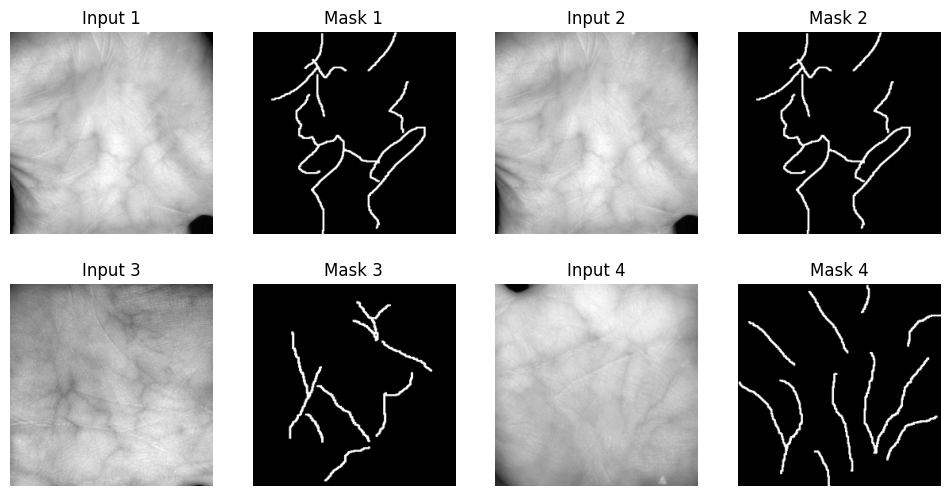

In [ ]:
import matplotlib.pyplot as plt
import random

# Assuming you have datasets of input images and mask images
# 'input_images_dataset' and 'mask_images_dataset' should be lists of NumPy arrays

# Set the number of random pairs you want to plot
num_pairs_to_plot = 4  # Adjust this to the number of pairs you want to display

# Create a Matplotlib figure with subplots
plt.figure(figsize=(12, 6))

for i in range(num_pairs_to_plot):
    # Randomly select an image index
    random_index = random.randint(0, len(image_dataset) - 1)

    # Select the input image and its corresponding mask
    random_input_image = image_dataset[random_index]
    random_mask_image = mask_dataset[random_index]

    # Add a subplot for the current pair
    plt.subplot(2, num_pairs_to_plot, 2 * i + 1)
    plt.imshow(random_input_image, cmap='gray')
    plt.title(f'Input {i+1}')
    plt.axis('off')

    plt.subplot(2, num_pairs_to_plot, 2 * i + 2)
    plt.imshow(random_mask_image, cmap='gray')
    plt.title(f'Mask {i+1}')
    plt.axis('off')

plt.show()

In [ ]:
# Building Unet by dividing encoder and decoder into blocks
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras.optimizers import Adam
from keras.layers import Activation, MaxPool2D, Concatenate


def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)   #Not in the original network.
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)  #Not in the original network
    x = Activation("relu")(x)

    return x

#Encoder block: Conv block followed by maxpooling


def encoder_block(input, num_filters):
    x = conv_block(input, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p

#Decoder block
#skip features gets input from encoder for concatenation

def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

#Build Unet using the blocks
def build_unet(input_shape, n_classes):
    inputs = Input(input_shape)
    inputs = Input(input_shape, dtype='float32')

    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    b1 = conv_block(p4, 1024) #Bridge

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    if n_classes == 1:  #Binary
      activation = 'sigmoid'
    else:
      activation = 'softmax'

    outputs = Conv2D(n_classes, 1, padding="same", activation=activation)(d4) #Change the activation based on n_classes
    print(activation)

    model = Model(inputs, outputs, name="U-Net")
    return model


IMG_HEIGHT = image_dataset.shape[1]
IMG_WIDTH  = image_dataset.shape[2]
IMG_CHANNELS = image_dataset.shape[3]

input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)



In [ ]:
print(input_shape)
model = build_unet(input_shape, n_classes=1)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

(256, 256, 1)
sigmoid
Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 64)         640       ['input_2[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 256, 256, 64)         256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 256, 256, 64)         0         ['ba

In [ ]:
import numpy as np
X_train = np.array(X_train)
print(X_train.shape)
history = model.fit(X_train, y_train,
                    batch_size = 32,
                    verbose=1,
                    epochs=100,
                    validation_data=(X_test, y_test),
                    shuffle=True)

(796, 256, 256, 1)
Epoch 1/100
25/25 [==============================] - 203s 5s/step - loss: -20.3948 - accuracy: 0.3962 - val_loss: 79.2148 - val_accuracy: 0.9431
Epoch 2/100
25/25 [==============================] - 46s 2s/step - loss: -56.9602 - accuracy: 0.6453 - val_loss: 75.7157 - val_accuracy: 0.9378
Epoch 3/100
25/25 [==============================] - 45s 2s/step - loss: -74.4273 - accuracy: 0.7005 - val_loss: 52.6429 - val_accuracy: 0.9321
Epoch 4/100
25/25 [==============================] - 46s 2s/step - loss: -86.7414 - accuracy: 0.7218 - val_loss: 27.9398 - val_accuracy: 0.9201
Epoch 5/100
25/25 [==============================] - 47s 2s/step - loss: -97.7177 - accuracy: 0.6983 - val_loss: 15.0555 - val_accuracy: 0.9129
Epoch 6/100
25/25 [==============================] - 46s 2s/step - loss: -112.1516 - accuracy: 0.6455 - val_loss: 5.3072 - val_accuracy: 0.9014
Epoch 7/100
25/25 [==============================] - 46s 2s/step - loss: -128.7812 - accuracy: 0.5640 - val_loss: -0

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/UNetHeatmap.ipynb.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


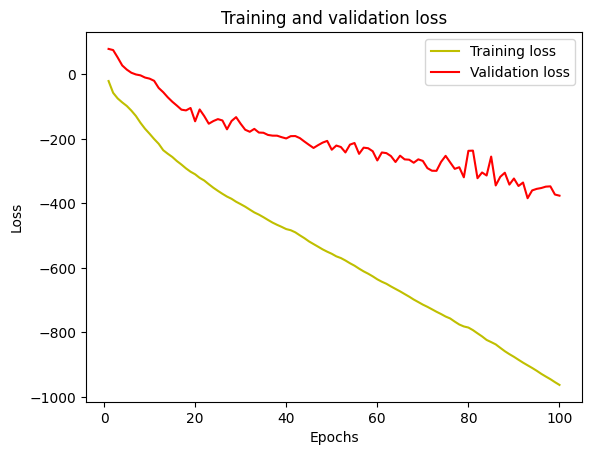

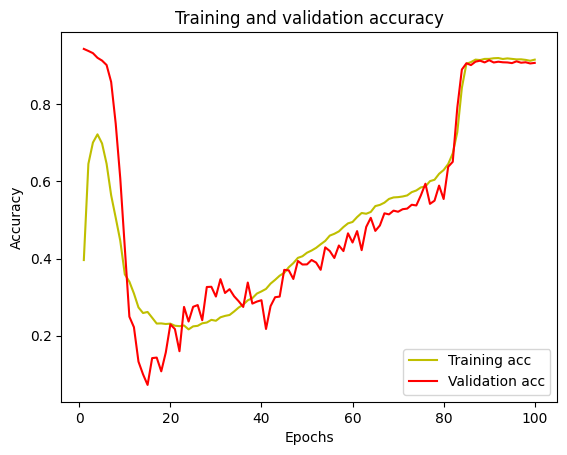

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Load previously saved model
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Colab Notebooks/UNetHeatmap.ipynb.h5',compile=False)

In [ ]:
#IOU
y_pred=model.predict(X_test)
y_pred_thresholded = y_pred > 0.5

7/7 [==============================] - 3s 499ms/step


In [ ]:
import numpy as np
def calculate_dice_coefficient(y_true, y_pred):
    """
    Calculates the Dice Coefficient of two binary segmentation masks.
    """
    intersection = np.sum(y_true * y_pred)
    total_pixels = np.sum(y_true) + np.sum(y_pred)
    dice_coefficient = (2.0 * intersection) / total_pixels if total_pixels != 0 else 0.0  # Avoid division by zero
    return dice_coefficient

In [ ]:
dice_coefficient = calculate_dice_coefficient(y_test, y_pred_thresholded)
print(f"Dice Coefficient: {dice_coefficient}")

Dice Coefficient: 0.9607503567787995


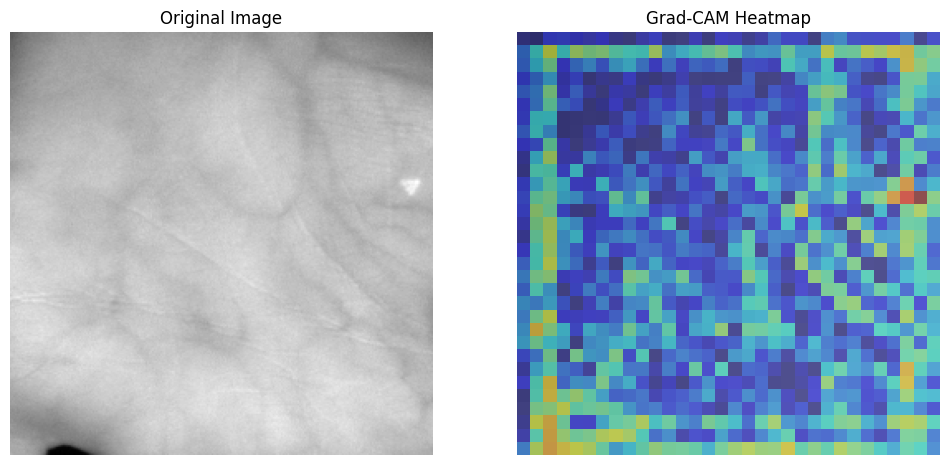

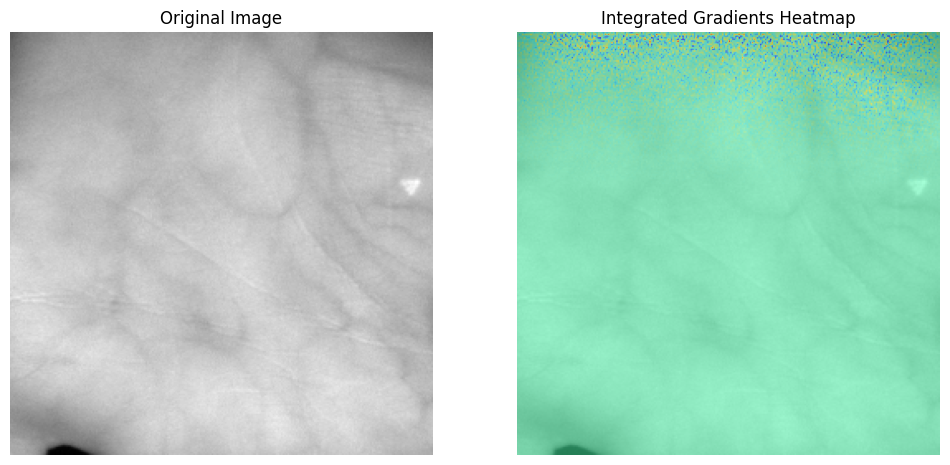

In [ ]:
from keras.models import Model
from keras.layers import Input, Activation, BatchNormalization, Concatenate, Conv2D, MaxPooling2D, UpSampling2D, Dropout
from keras.optimizers import Adam
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random

# Grad-CAM
def grad_cam(model, image, layer_name):
    """
    Grad-CAM: Gradient-weighted Class Activation Mapping
    """
    model = Model(inputs=model.inputs, outputs=[model.get_layer(layer_name).output, model.output])
    with tf.GradientTape() as tape:
        inputs = tf.cast(tf.expand_dims(image, axis=0), tf.float32)
        conv_output, predictions = model(inputs)
        loss = predictions[:, 0]
        grads = tape.gradient(loss, conv_output)
        pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output[0]), axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    return heatmap

# Visualize the Grad-CAM heatmap overlaid on the original image
def visualize_grad_cam(model, image, layer_name):
    heatmap = grad_cam(model, image, layer_name)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(image, cmap='gray')
    plt.imshow(heatmap, cmap='jet', alpha=0.5)
    plt.title('Grad-CAM Heatmap')
    plt.axis('off')
    plt.show()

# Integrated Gradients
def integrated_gradients(model, image, steps=50):
    """
    Integrated Gradients
    """
    input_tensor = tf.convert_to_tensor(image, dtype=tf.float32)
    input_tensor = tf.expand_dims(input_tensor, axis=0)

    with tf.GradientTape() as tape:
        tape.watch(input_tensor)
        output = model(input_tensor)[0, 0]

    gradients = tape.gradient(output, input_tensor)

    alpha_range = np.linspace(start=0, stop=1, num=steps)
    integrated_grads = np.zeros_like(image)

    for alpha in alpha_range:
        interpolated_image = input_tensor * alpha
        with tf.GradientTape() as tape:
            tape.watch(interpolated_image)
            output = model(interpolated_image)[0, 0]
        grad = tape.gradient(output, interpolated_image)
        integrated_grads += grad * (image / steps)

    return integrated_grads[0]

# Visualize the Integrated Gradients heatmap overlaid on the original image
def visualize_integrated_gradients(model, image):
    integrated_grads = integrated_gradients(model, image)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(image, cmap='gray')
    plt.imshow(integrated_grads, cmap='jet', alpha=0.5)
    plt.title('Integrated Gradients Heatmap')
    plt.axis('off')
    plt.show()

# Example usage
test_img_number = random.randint(0, len(X_test)-1)
test_img = X_test[test_img_number]

# Visualize Grad-CAM heatmap
visualize_grad_cam(model, test_img, 'conv2d_7')

# Visualize Integrated Gradients heatmap
visualize_integrated_gradients(model, test_img)

1/1 [==============================] - 0s 110ms/step


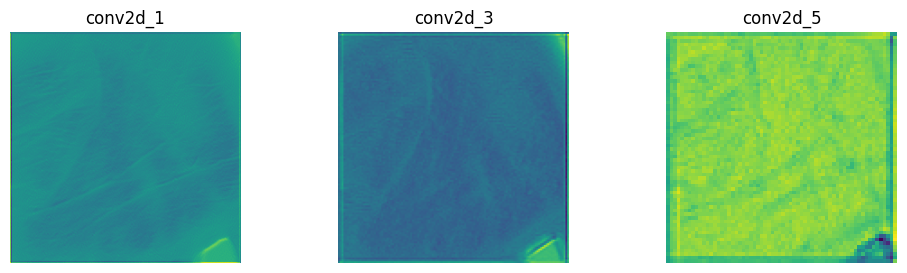

In [ ]:
from keras.models import Model
import tensorflow as tf
import matplotlib.pyplot as plt

def visualize_activations(model, image, layer_names):
    """
    Visualize the activation maps of the specified layers.
    """
    model_layers = [model.get_layer(name) for name in layer_names]
    activation_model = Model(inputs=model.input, outputs=[layer.output for layer in model_layers])
    activations = activation_model.predict(np.expand_dims(image, axis=0))

    fig, axes = plt.subplots(1, len(layer_names), figsize=(12, 3))
    for i, activation in enumerate(activations):
        axes[i].imshow(activation[0, :, :, 0], cmap='viridis')
        axes[i].set_title(layer_names[i])
        axes[i].axis('off')
    plt.show()

# Example usage
layer_names = ['conv2d_1', 'conv2d_3', 'conv2d_5']
visualize_activations(model, test_img, layer_names)

(1, 256, 256, 1)
1/1 [==============================] - 0s 283ms/step
(256, 256)


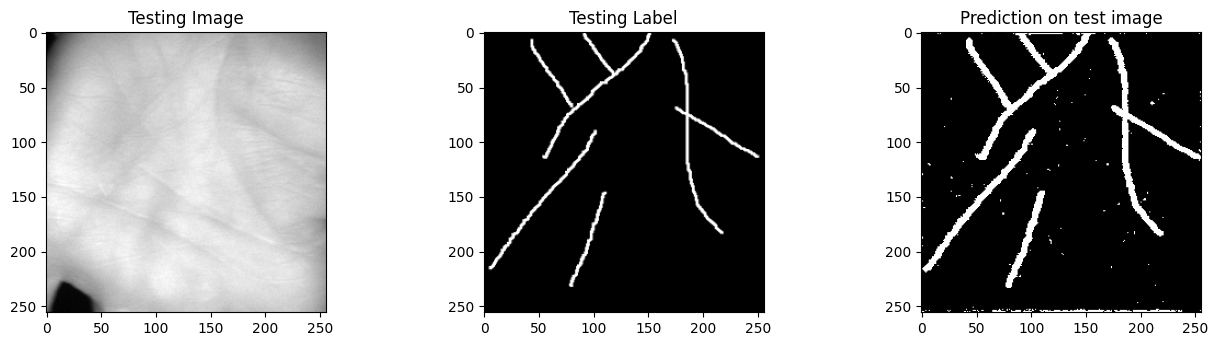

In [ ]:
import random
threshold = 0.5
test_img_number = random.randint(0, len(X_test)-1)
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_input=np.expand_dims(test_img, 0)
print(test_img_input.shape)
prediction = (model.predict(test_img_input)[0,:,:,0] > 0.5).astype(np.uint8)
print(prediction.shape)

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')

plt.show()

1/1 [==============================] - 0s 30ms/step


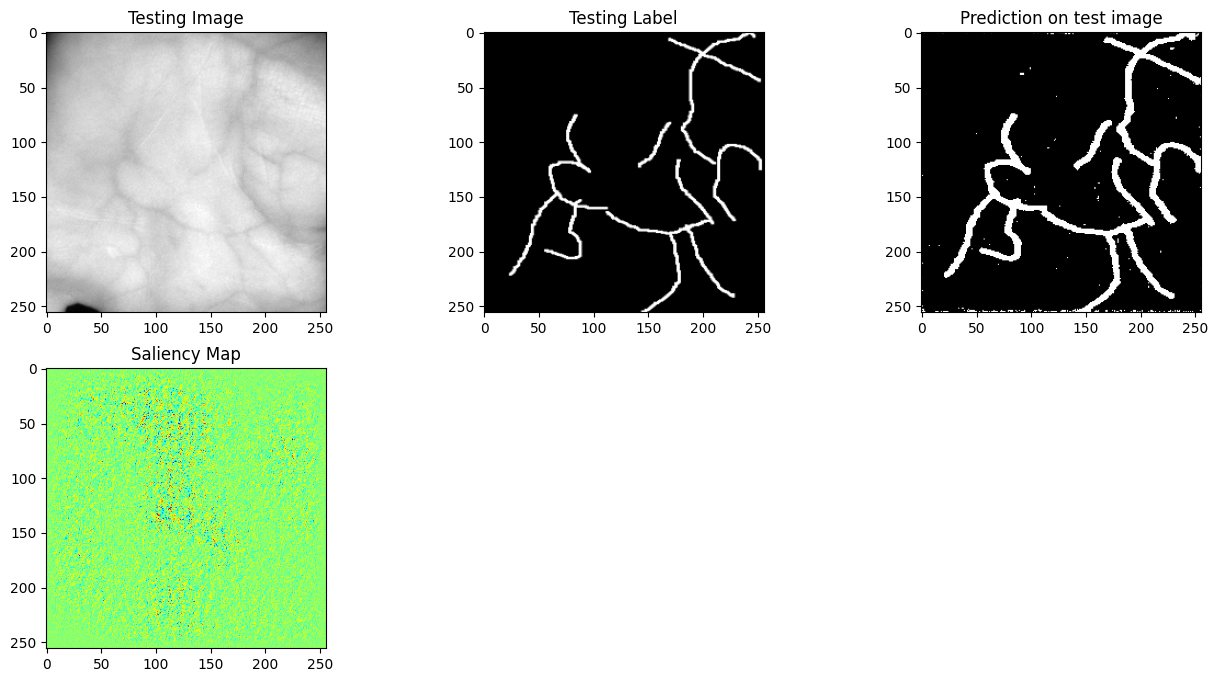

In [ ]:
import matplotlib.pyplot as plt
import random

# Randomly select an image from the dataset
random_index = random.randint(0, len(X_test) - 1)
test_img = X_test[random_index]
ground_truth = y_test[random_index]
test_img_input = np.expand_dims(test_img, 0)

# Convert the input image to float32
test_img_input_float32 = tf.cast(test_img_input, tf.float32)

# Get the output value for this test image
y_out = model.output[:, :, :, 0]

# Compute the gradients of the output value with respect to the input
with tf.GradientTape() as tape:
    tape.watch(test_img_input_float32)
    predictions = model(test_img_input_float32)
    gradients = tape.gradient(predictions, test_img_input_float32)

# Compute the saliency map
saliency_map = gradients[0, :, :, 0]

# Plot the results
plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:, :, 0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:, :, 0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
prediction = (model.predict(test_img_input)[0, :, :, 0] > 0.5).astype(np.uint8)
plt.imshow(prediction, cmap='gray')
plt.subplot(234)
plt.title('Saliency Map')
plt.imshow(saliency_map, cmap='jet')

plt.show()


In [ ]:
# Evaluation Metrics
import numpy as np
from sklearn.metrics import confusion_matrix

def calculate_iou(y_true, y_pred):
    """
    Calculates the Intersection over Union (IoU) of two binary segmentation masks.
    """
    intersection = np.sum(np.logical_and(y_true, y_pred))
    union = np.sum(np.logical_or(y_true, y_pred))
    iou = intersection / union if union != 0 else 0.0  # Avoid division by zero
    return iou

def calculate_dice_coefficient(y_true, y_pred):
    """
    Calculates the Dice Coefficient of two binary segmentation masks.
    """
    intersection = np.sum(y_true * y_pred)
    total_pixels = np.sum(y_true) + np.sum(y_pred)
    dice_coefficient = (2.0 * intersection) / total_pixels if total_pixels != 0 else 0.0  # Avoid division by zero
    return dice_coefficient

def calculate_confusion_matrix(y_true, y_pred, num_classes):
    """
    Calculates the confusion matrix for a multi-class segmentation task.
    """
    # Flatten the arrays for confusion_matrix function
    y_true_flat = y_true.flatten()
    y_pred_flat = y_pred.flatten()

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_true_flat, y_pred_flat, labels=range(num_classes))
    return conf_matrix

iou = calculate_iou(y_test, y_pred_thresholded)
dice_coefficient = calculate_dice_coefficient(y_test, y_pred_thresholded)
conf_matrix = calculate_confusion_matrix(y_test, y_pred_thresholded, num_classes=1)

print(f"IoU: {iou}")
print(f"Dice Coefficient: {dice_coefficient}")
print("Confusion Matrix:")
print(conf_matrix)

IoU: 0.2902529848163067
Dice Coefficient: 0.9607503567787995
Confusion Matrix:
[[11825425]]


In [ ]:
# XAI Methods
from keras.models import Model
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Grad-CAM
def grad_cam(model, image, layer_name):
    """
    Grad-CAM: Gradient-weighted Class Activation Mapping
    """
    model = Model(inputs=model.inputs, outputs=[model.get_layer(layer_name).output, model.output])
    with tf.GradientTape() as tape:
        inputs = tf.cast(tf.expand_dims(image, axis=0), tf.float32)
        conv_output, predictions = model(inputs)
        loss = predictions[:, 0]
        grads = tape.gradient(loss, conv_output)
        pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output[0]), axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    return heatmap

# Grad-CAM example
test_img_number = random.randint(0, len(X_test)-1)
test_img = X_test[test_img_number]
test_img_input = np.expand_dims(test_img, 0)
heatmap = grad_cam(model, test_img, 'conv2d_7')


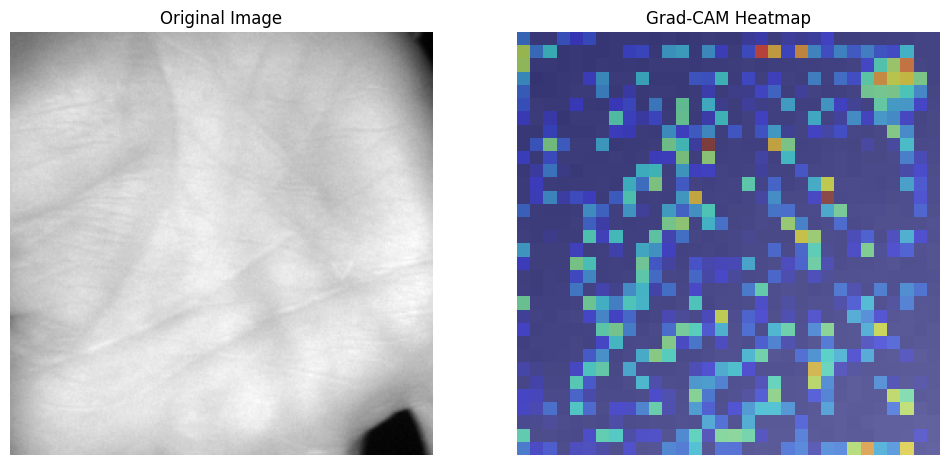

In [ ]:
# Grad-CAM Visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(test_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(test_img, cmap='gray')
plt.imshow(heatmap, cmap='jet', alpha=0.5)
plt.title('Grad-CAM Heatmap')
plt.axis('off')
plt.show()

In [ ]:
# Integrated Gradients
def integrated_gradients(model, image, steps=50):
    """
    Integrated Gradients
    """
    input_tensor = tf.convert_to_tensor(image, dtype=tf.float32)
    input_tensor = tf.expand_dims(input_tensor, axis=0)

    with tf.GradientTape() as tape:
        tape.watch(input_tensor)
        output = model(input_tensor)[0, 0]

    gradients = tape.gradient(output, input_tensor)

    alpha_range = np.linspace(start=0, stop=1, num=steps)
    integrated_grads = np.zeros_like(image)

    for alpha in alpha_range:
        interpolated_image = input_tensor * alpha
        with tf.GradientTape() as tape:
            tape.watch(interpolated_image)
            output = model(interpolated_image)[0, 0]
        grad = tape.gradient(output, interpolated_image)
        integrated_grads += grad * (image / steps)

    return integrated_grads[0]


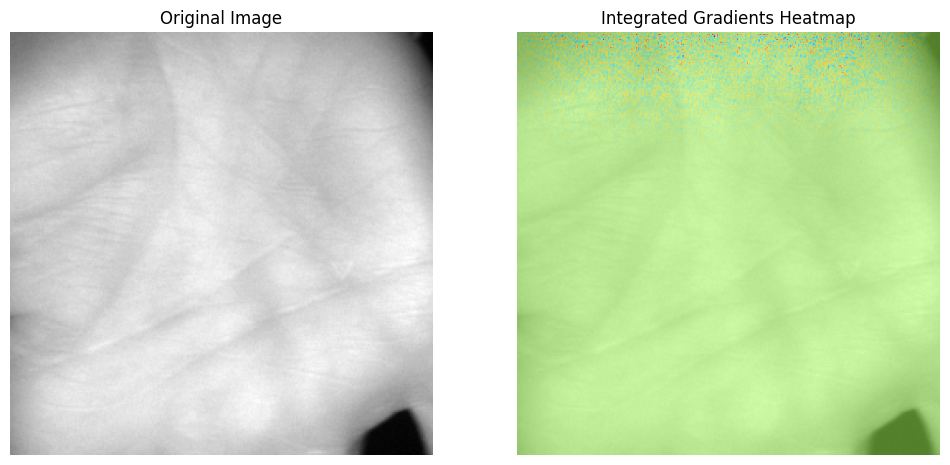

In [ ]:
# Integrated Gradients example
integrated_grads = integrated_gradients(model, test_img)
# Integrated Gradients Visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(test_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(test_img, cmap='gray')
plt.imshow(integrated_grads, cmap='jet', alpha=0.5)
plt.title('Integrated Gradients Heatmap')
plt.axis('off')
plt.show()